In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import mesh
import geometry
import material
from stress_strain_analysis import stress_strain_analysis
import plot_functions

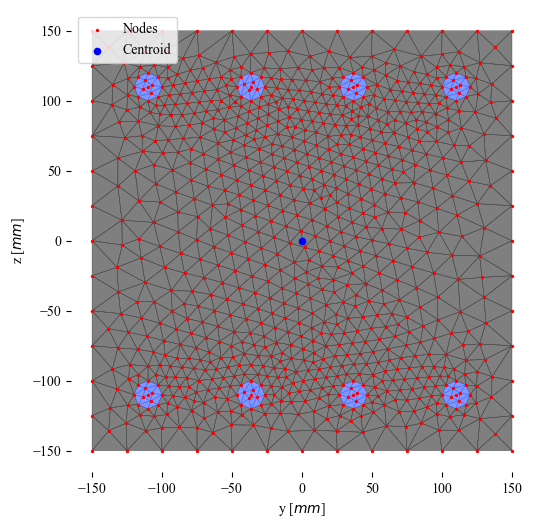

╒════════════════════╤══════════╕
│ Mesh Type          │ triangle │
├────────────────────┼──────────┤
│ Number of elements │ 1694     │
├────────────────────┼──────────┤
│ Number of nodes    │ 880      │
├────────────────────┼──────────┤
│ Cross Section Area │ 90000.00 │
╘════════════════════╧══════════╛
╒══════════════════════════╤══════════════╤══════════════╕
│                          │            y │            z │
╞══════════════════════════╪══════════════╪══════════════╡
│ Centroid [mm]            │        -0.00 │        -0.00 │
├──────────────────────────┼──────────────┼──────────────┤
│ Moment of inertia [mm^4] │ 675000000.00 │ 675000000.00 │
╘══════════════════════════╧══════════════╧══════════════╛


In [2]:
ReinforcedConcrete = geometry.ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 20,
                                                       rebar_spacing  = 50)
Mesh = mesh.Mesh(ReinforcedConcrete, "triangle", 25)

Mesh.plot()
Mesh.print()

(69.14553620091937, 19.379829735579715, 3.56224109429519)


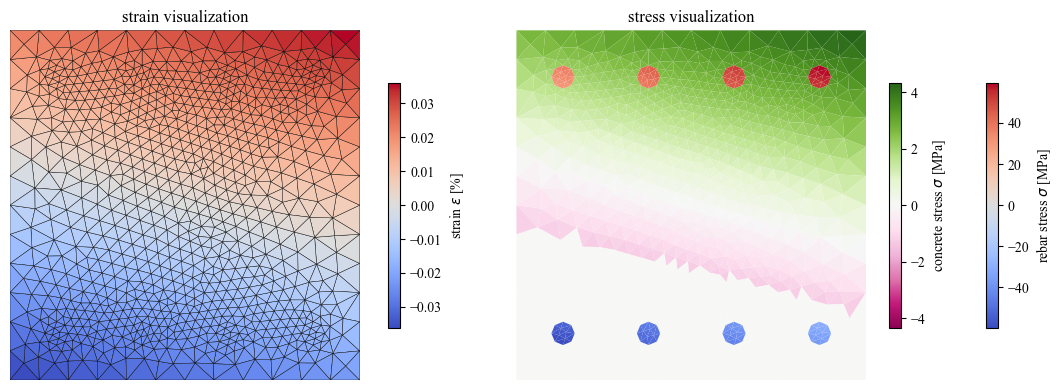

In [3]:
Analysis = stress_strain_analysis(Mesh)

Analysis.set_strain_and_curvature(0, 0.000002, 0.0000005)
# Analysis.set_strain_and_curvature(0, 0.00002, 0.000005)

Analysis.calculate_strains()
Analysis.calculate_stresses()

print(Analysis.get_section_forces())

plot_functions.plot_stress_strain_RC(Analysis)

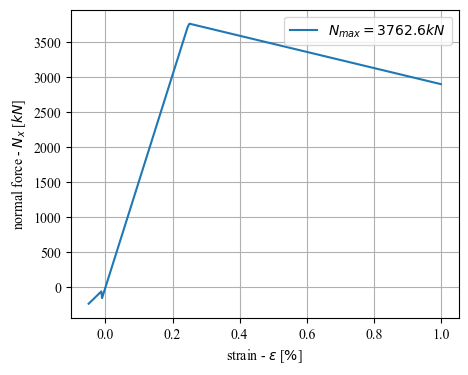

In [4]:
strains = np.linspace(-0.0005, 0.01, 500)
plot_functions.plot_linear_variation_eps(Analysis, strains)

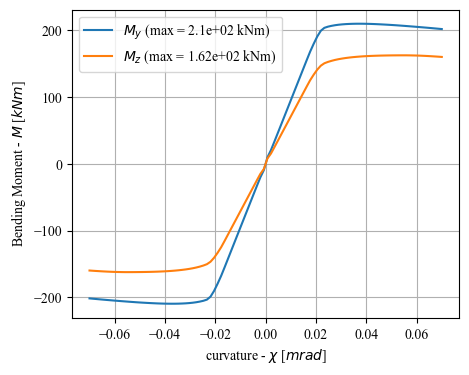

In [5]:
curvs = np.linspace(-0.00007, 0.00007, 100)
plot_functions.plot_linear_variation_curv(Analysis, curvs)

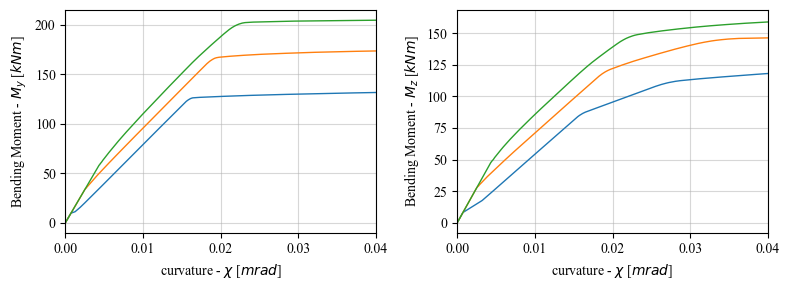

In [6]:
N = [0, 400, 800]
My_lim = [0, 250]
Mz_lim = [0, 250]
plot_functions.plot_influence_of_N_on_M(Analysis, N, My_lim, Mz_lim, False)

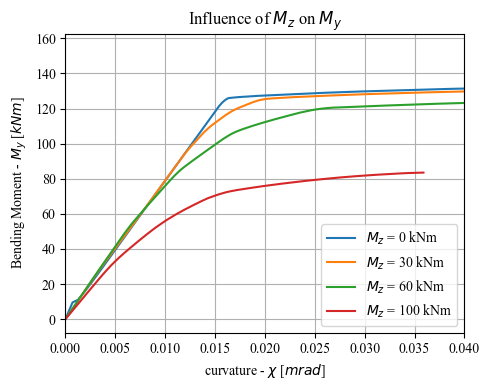

In [7]:
Mz = [0, 30, 60, 100]
My_lim = [0, 250]
plot_functions.plot_influence_of_Mz_on_My(Analysis, My_lim, Mz, False)